<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/book2/29/newsgroups_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pylab

%matplotlib inline
pylab.rcParams["figure.figsize"] = (15, 10)

In [2]:
import requests
from io import BytesIO
from scipy.io import loadmat

url = "https://raw.githubusercontent.com/probml/probml-data/main/data/20news_w100.mat"
response = requests.get(url)
# rawdata = response.text
rawdata = BytesIO(response.content)
data = loadmat(rawdata)
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Sat Jun 29 15:07:10 2002', '__version__': '1.0', '__globals__': [], 'documents': <100x16242 sparse matrix of type '<class 'numpy.uint8'>'
	with 65451 stored elements in Compressed Sparse Column format>, 'wordlist': array([[array(['aids'], dtype='<U4'), array(['baseball'], dtype='<U8'),
        array(['bible'], dtype='<U5'), array(['bmw'], dtype='<U3'),
        array(['cancer'], dtype='<U6'), array(['car'], dtype='<U3'),
        array(['card'], dtype='<U4'), array(['case'], dtype='<U4'),
        array(['children'], dtype='<U8'),
        array(['christian'], dtype='<U9'),
        array(['computer'], dtype='<U8'), array(['course'], dtype='<U6'),
        array(['data'], dtype='<U4'), array(['dealer'], dtype='<U6'),
        array(['disease'], dtype='<U7'), array(['disk'], dtype='<U4'),
        array(['display'], dtype='<U7'), array(['doctor'], dtype='<U6'),
        array(['dos'], dtype='<U3'), array(['drive'], dtype='<U5'),

In [5]:
X = data["documents"]
print(type(X))
print(X.shape)

<class 'scipy.sparse.csc.csc_matrix'>
(100, 16242)


In [6]:
X = X.T  # 对X进行转置
print(X.shape, type(X))

(16242, 100) <class 'scipy.sparse.csr.csr_matrix'>


In [7]:
y = data["newsgroups"]
classlabels = data["groupnames"]
print(type(classlabels), classlabels.shape)

<class 'numpy.ndarray'> (1, 4)


In [8]:
nwords = np.sum(X, 1)
print(nwords.shape, "\n", nwords[:5], type(nwords))

(16242, 1) 
 [[5]
 [1]
 [3]
 [3]
 [4]] <class 'numpy.matrix'>


In [9]:
word_num_index = np.argsort(-nwords, axis=0)
print(word_num_index.shape, type(word_num_index))
index_1000 = np.array(word_num_index[:1000])
print(index_1000.shape, type(index_1000))

(16242, 1) <class 'numpy.matrix'>
(1000, 1) <class 'numpy.ndarray'>


In [10]:
XX = X[index_1000.flatten()].toarray()
yy = y.T[index_1000.flatten()]
print(type(XX), XX.shape)
print(type(yy), yy.shape)
new_yy = np.sort(yy, axis=0)
index_of_yy = np.argsort(yy, axis=0)
XX = XX[index_of_yy.flatten()]
print(XX.shape)

<class 'numpy.ndarray'> (1000, 100)
<class 'numpy.ndarray'> (1000, 1)
(1000, 100)


In [11]:
yy_unique = np.unique(new_yy)
print(yy_unique)

[1 2 3 4]


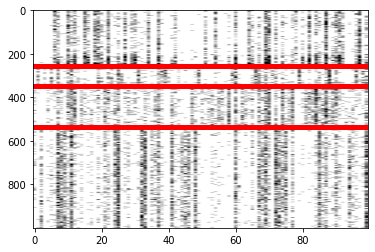

In [12]:
ax = plt.gca()
ax.imshow(XX, cmap=plt.cm.gray_r, aspect="auto")

for label in yy_unique[:-1]:
    label_index = np.where(new_yy.flatten() == label)[-1][-1]
    line1 = [(0, label_index), (XX.shape[1], label_index)]
    (line1_xs, line1_ys) = zip(*line1)
    ax.add_line(Line2D(line1_xs, line1_ys, linewidth=5, color="red"))